# Create DNN Model

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


-  Define function of create model

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model
  
model = model_fn()
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f9181716750>>

# Loss Curve

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

- verbose default 1: print the indicator along with the progress bar per epoch.
- verbose 2: print the indicator without the progress bar per epoch.
- verbose 0: print none

In [9]:
print(history) # class
print(history.history) # dictionary
print(history.history.keys())

{'loss': [0.5360119342803955, 0.3935061991214752, 0.3552784025669098, 0.33411645889282227, 0.31946054100990295], 'accuracy': [0.8113541603088379, 0.8598541617393494, 0.8732083439826965, 0.8820000290870667, 0.8862708210945129]}
dict_keys(['loss', 'accuracy'])


- loss curve (epoch 5)

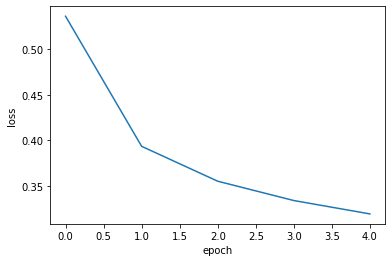

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- accuracy curve (epoch 5)

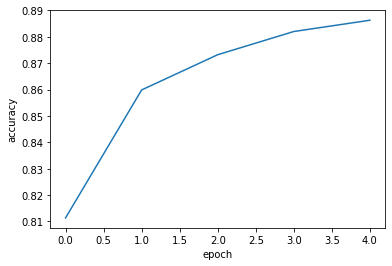

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- loss curve (epoch 20)

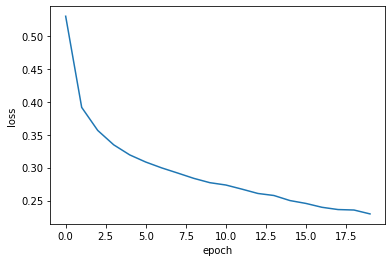

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Validation Loss

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5344 - accuracy: 0.8118 - val_loss: 0.4414 - val_accuracy: 0.8471
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3950 - accuracy: 0.8577 - val_loss: 0.3638 - val_accuracy: 0.8668
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3573 - accuracy: 0.8702 - val_loss: 0.3754 - val_accuracy: 0.8682
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8791 - val_loss: 0.3783 - val_accuracy: 0.8701
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3191 - accuracy: 0.8865 - val_loss: 0.3576 - val_accuracy: 0.8772
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3085 - accuracy: 0.8898 - val_loss: 0.3556 - val_accuracy: 0.8806
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2982 - accuracy: 0.8948 - val_loss: 0.3736 - val_accuracy:

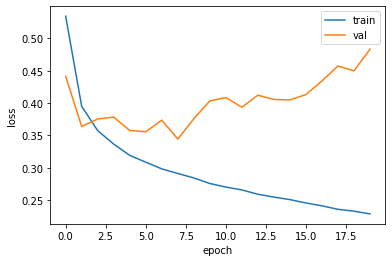

In [15]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- There is a large difference in loss between training data and verification data.
- This is a typical overfitting model.

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5231 - accuracy: 0.8183 - val_loss: 0.4741 - val_accuracy: 0.8357
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8576 - val_loss: 0.3736 - val_accuracy: 0.8671
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3557 - accuracy: 0.8703 - val_loss: 0.3567 - val_accuracy: 0.8712
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3273 - accuracy: 0.8796 - val_loss: 0.3398 - val_accuracy: 0.8790
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3091 - accuracy: 0.8872 - val_loss: 0.3324 - val_accuracy: 0.8803
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2904 - accuracy: 0.8925 - val_loss: 0.3194 - val_accuracy: 0.8842
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2802 - accuracy: 0.8967 - val_loss: 0.3333 - val_accuracy:

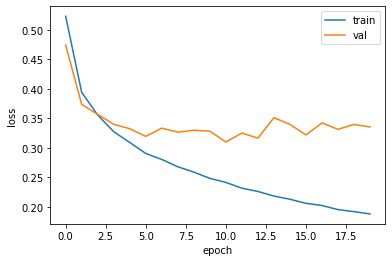

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Overfitting has decreased a little, but it is still necessary to improve.

# Dropout
- Basically, it is a principle to calculate all parameters.
- Neurons without some output are excluded from the calculation.

In [16]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5967 - accuracy: 0.7907 - val_loss: 0.4495 - val_accuracy: 0.8294
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4413 - accuracy: 0.8409 - val_loss: 0.4071 - val_accuracy: 0.8472
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4044 - accuracy: 0.8547 - val_loss: 0.3616 - val_accuracy: 0.8674
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3833 - accuracy: 0.8603 - val_loss: 0.3605 - val_accuracy: 0.8651
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3688 - accuracy: 0.8646 - val_loss: 0.3423 - val_accuracy: 0.8750
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3542 - accuracy: 0.8696 - val_loss: 0.3479 - val_accuracy: 0.8744
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3439 - accuracy: 0.8725 - val_loss: 0.3449 - val_accuracy:

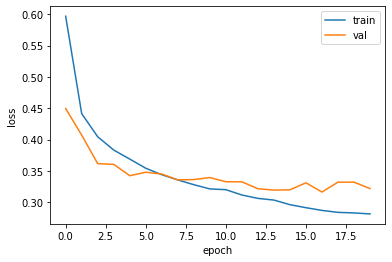

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Overfitting has improved a lot.

# Save and Load Model

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

- save_weights() : method of saving the parameters of a model
- save() : method of saving both the parameters and structure of a model
- '.h5' : HDF5 format

In [23]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [24]:
!ls -al *.h5

-rw-r--r-- 1 root root 982664 Apr  5 02:37 best-model.h5
-rw-r--r-- 1 root root 333448 Apr  5 02:42 model-weights.h5
-rw-r--r-- 1 root root 982664 Apr  5 02:42 model-whole.h5


- load previously saved parameters

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [26]:
# Returns the largest value in the predict method result
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8825833333333334


- load previously saved model

In [27]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8826


[0.3247545063495636, 0.8825833201408386]

# Callback

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5955 - accuracy: 0.7909 - val_loss: 0.4305 - val_accuracy: 0.8437
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4369 - accuracy: 0.8436 - val_loss: 0.3847 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4027 - accuracy: 0.8533 - val_loss: 0.3737 - val_accuracy: 0.8633
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3833 - accuracy: 0.8607 - val_loss: 0.3648 - val_accuracy: 0.8628
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3675 - accuracy: 0.8662 - val_loss: 0.3481 - val_accuracy: 0.8703
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3544 - accuracy: 0.8710 - val_loss: 0.3434 - val_accuracy: 0.8758
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3435 - accuracy: 0.8736 - val_loss: 0.3388 - val_accuracy:

In [32]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8842


[0.32058343291282654, 0.8842499852180481]

- early stopping : to stop training before overfitting begins

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [38]:
print(early_stopping_cb.stopped_epoch)

5


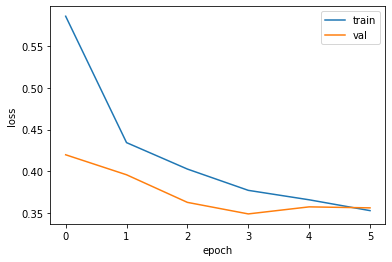

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- It stopped early in 5 epoch, and the issue of overfitting was solved.